## IMPORTAR BIBLIOTECAS

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

## CARGAR DATA

In [13]:
df=pd.read_csv('/Users/andrezaragozabonilla/Desktop/E-commerce/data.csv',encoding= 'unicode_escape')

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Conociendo la DATA

In [15]:
# Dimensiones del DataFrame
df.shape

(541909, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [17]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
# Convertir la varaible InvoiceDate de tipo "objecto" a "datatime"
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [20]:
# Verificar que se realizó el cambio
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

## Análisis de características

- **Dividir categoricas y númericas**

In [27]:
# Variables Categóricas
cat_var = df.select_dtypes(include=['object'])
cat_var.head()

,InvoiceNo,StockCode,Description,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


In [28]:
# Variables Númericas
num_var = df.select_dtypes(include=['int64', 'float64','datetime64[ns]'])
num_var.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,2010-12-01 08:26:00,2.55,17850.0
1,6,2010-12-01 08:26:00,3.39,17850.0
2,8,2010-12-01 08:26:00,2.75,17850.0
3,6,2010-12-01 08:26:00,3.39,17850.0
4,6,2010-12-01 08:26:00,3.39,17850.0


## Manejo de Variables

In [29]:
# Se creara una copia de la data original
df_copy=df.copy()

In [31]:
# Comenzaremos por revisar los nulos
df_copy.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [32]:
# Se decide dropear los nulos porque:
# En el caso de Description es una cantidad poco representativa de los datos.
# En el caso de CustomerID, es un número único, es por eso que no se puede remplazar con las medias ni con la moda.
df_copy.dropna(inplace=True)

In [33]:
# Se elimina la columna InvoiceDate ya que no será relevante para el análisis.
df_copy=df_copy.drop(['InvoiceDate'], axis=1)

In [34]:
# Volvemos a revisar las dimensiones de nuestro Dataset
df_copy.shape

(406829, 7)

## Exploratory Data Analysis

In [37]:
# Empezamos por convertir la variable CustomerId de tipo "flotante" a "entero"
df_copy['CustomerID'] = df_copy['CustomerID'].astype(int)

### **Top 10 clientes con más compras**

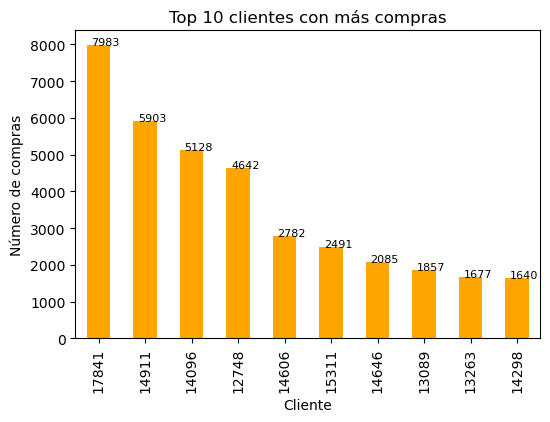

In [50]:
customer = df_copy['CustomerID'].value_counts().head(10).plot.bar(figsize=(6,4), color='orange')
customer.set_xlabel('Cliente')
customer.set_ylabel('Número de compras')
customer.set_title('Top 10 clientes con más compras')

for i in customer.patches:
    customer.text(i.get_x()+0.1, i.get_height()+1, str(i.get_height()), fontsize=8)


### **Cantidad promedio de compras por cliente**

In [54]:
# Agrupamos los datos por número de cliente y calcular el promedio de compras por cliente
average_purchases = df_copy.groupby("CustomerID")["Quantity"].mean()

print("La cantidad promedio de compras por cliente es:", round(average_purchases.mean(),2))

La cantidad promedio de compras por cliente es: 22.39


### **Ventas por mes** 

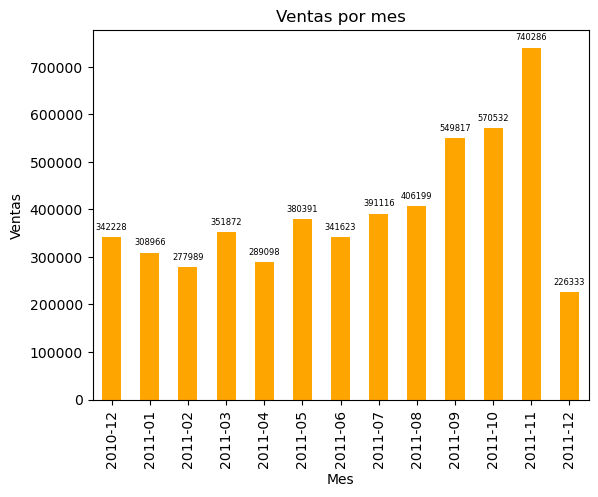

In [49]:
# Agrupamos las ventas por mes
sales_by_month = df.groupby(df['InvoiceDate'].dt.strftime('%Y-%m'))['Quantity'].sum()

# Se crea un gráfico de barras
ax = sales_by_month.plot(kind='bar', color='orange')

# Establecemos las etiquetas de los ejes y el título
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Ventas por mes')

# Agregamos el número exacto de ventas en la parte superior de cada barra
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=6, padding=4)

plt.show()

### **Ventas por día de la semana**

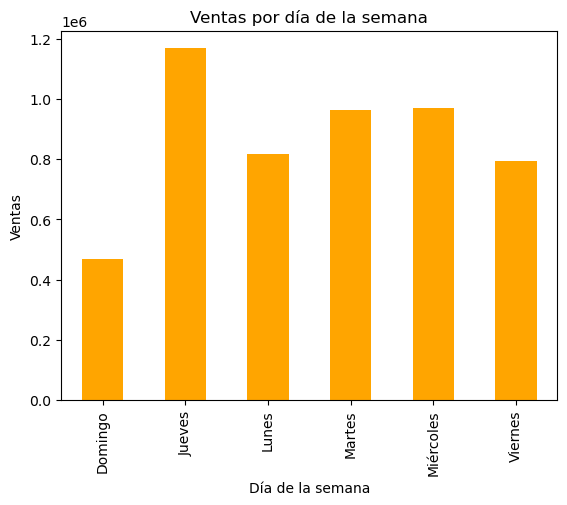

In [53]:
# Extraer el día de la semana de la venta
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Asignar el nombre del día de la semana a cada venta
day_mapping = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping)

# Agrupar las ventas por día de la semana
sales_by_day = df.groupby('DayOfWeek')['Quantity'].sum()

# Crear un gráfico de barras
sales_by_day.plot(kind='bar', color='orange')

# Establecer las etiquetas de los ejes y el título
plt.xlabel('Día de la semana')
plt.ylabel('Ventas')
plt.title('Ventas por día de la semana')
plt.show()

### **Ventas por hora del día**

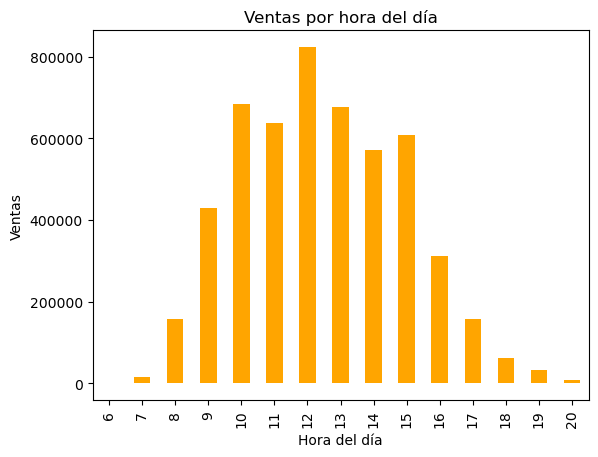

In [51]:
# Extraer la hora de la venta
df['Hour'] = df['InvoiceDate'].dt.hour

# Agrupar las ventas por hora del día
sales_by_hour = df.groupby('Hour')['Quantity'].sum()

# Crear un gráfico de barras
sales_by_hour.plot(kind='bar', color='orange')

# Establecer las etiquetas de los ejes y el título
plt.xlabel('Hora del día')
plt.ylabel('Ventas')
plt.title('Ventas por hora del día')
plt.show()

### **Día y hora con más ventas**

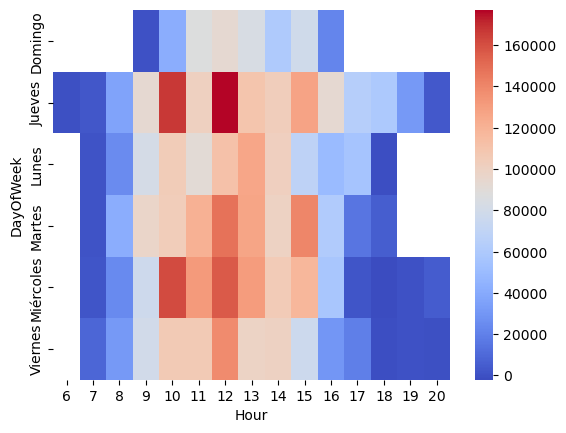

In [59]:
# Crear una tabla pivote de las ventas por día de la semana y hora del día
sales_by_day_hour = df.pivot_table(index='DayOfWeek', columns='Hour', values='Quantity', aggfunc='sum')

# Crear el heatmap
sns.heatmap(sales_by_day_hour, cmap='coolwarm')

# Mostrar el heatmap
plt.show()

- **Podemos concluir que las ventas alcanzan su punto máximo los jueves a las 12 del mediodía, según los datos analizados.**